# Start Of The Deep Learning ERA - BackProp 

Implementation of an `autograd engine` to understand `Backpropagation` 

The engine performs `Backpropagation`. It calculates the gradient of the weights with respect to the loss function.

Then, it uses the gradient algorithm to `adjust the values of the weights` relative to the loss function so that the `loss moves towards zero.`

## Some Stuff You Should Know Before Building Autograd Engine : 

### How Backpropagation Is Get Used In Training Deep Neural Networks ?

#### `STEPS: `

`Initialize Param:`  Start by initializing the neural network with random weights.(why cause its just help)

`Forward Pass:` Pass the input data through the network to get the predicted output.

`Compute Loss:` Calculate the loss by comparing the predicted output with the actual target values.

`Backprop:` Perform backpropagation to calculate the gradient of the loss with respect to each weight in the network.

`Update Weights:` Use the ``gradient algorithm`` to adjust the weights based on the calculated gradients, in order to minimize the loss.

`Repeat:` Repeat steps 2-5 for a set number of epochs or until the loss goes close to zero.

 




### All Math Behind The BackProp 

#### 1. Derivation of add 

![add](../../images/add-1.drawio.png)

Given the equation:


$$
c = a + b
$$

### Finding the Partial Derivative of \( c \) with Respect to \( a \):

We need to find the partial derivative of \( c \) with respect to \( a \):

$$
\frac{\partial c}{\partial a} = \frac{\partial a}{\partial a} + \frac{\partial b}{\partial a}
$$

Since:

$$
\frac{\partial a}{\partial a} = 1
$$

And:

$$
\frac{\partial b}{\partial a} = 0
$$

Therefore:

$$
\frac{\partial c}{\partial a} = 1
$$

### Finding the Partial Derivative of \( c \) with Respect to \( b \):

Next, we find the partial derivative of \( c \) with respect to \( b \):

$$
\frac{\partial c}{\partial b} = \frac{\partial a}{\partial b} + \frac{\partial b}{\partial b}
$$

Since:

$$
\frac{\partial a}{\partial b} = 0
$$

And:

$$
\frac{\partial b}{\partial b} = 1
$$

Therefore:

$$
\frac{\partial c}{\partial b} = 1
$$




#### 2. Derivation of mul


![mul](../../images/mul.drawio.png)


Given the equation:

$$
c = a \times b
$$

### Finding the Partial Derivative of \( c \) with Respect to \( a \):

We need to find the partial derivative of \( c \) with respect to \( a \):

$$
\frac{\partial c}{\partial a} = b \frac{\partial a}{\partial a} + a \frac{\partial b}{\partial a}
$$

Since:

$$
\frac{\partial a}{\partial a} = 1
$$

And:

$$
\frac{\partial b}{\partial a} = 0
$$

Therefore:

$$
\frac{\partial c}{\partial a} = b
$$

### Finding the Partial Derivative of \( c \) with Respect to \( b \):

Next, we find the partial derivative of \( c \) with respect to \( b \):

$$
\frac{\partial c}{\partial b} = a \frac{\partial a}{\partial b} + b \frac{\partial b}{\partial b}
$$

Since:

$$
\frac{\partial a}{\partial b} = 0
$$

And:

$$
\frac{\partial b}{\partial b} = 1
$$

Therefore:

$$
\frac{\partial c}{\partial b} = a
$$


#### 3. The Chain Rule 

Check Out This Pdf for `BackProp Manually` : [Link](../../01-deep-neural-networks/01-dnn/backprop.pdf)

### Gradient Descent The MC Of The Backpropogation:

![img](../../images/for_revered_guest.png)




#### Let's Learn How It Works Internally `(All The Math):`

`J(θ1,θ2) -> J(w,b)`

$$
J(w, b) \text{ is the cost function.}
$$

$$
w_i = w_i - \alpha \frac{\partial J}{\partial w_i}
$$

$$
b = b - \alpha \frac{\partial J}{\partial b}
$$

forward pass `->` calculate loss `->` backprop `->` **update the weights** (by using above equations)

The `line` on the graph depicts the `gradient descent algorithm`, showing its process of updating parameters to minimize the loss towards zero.
 
The provided `formulas does all the weights updation`.

### Read More, Learn More and Build More:

#### Books -> 

1. [Machine Learning with PyTorch and Scikit-Learn by Sebastian Raschka](https://www.amazon.in/Machine-Learning-PyTorch-Scikit-Learn-learning-ebook/dp/B09NW48MR1)

2. [Understanding Deep Learning](https://udlbook.github.io/udlbook/)


#### Video Tutorials ->

1. [Micrograd by Andrej Karpathy](https://www.youtube.com/watch?v=VMj-3S1tku0)
2. [What is backpropagation really doing? by 3Blue1Brown](https://www.youtube.com/@3blue1brown)


## Now lets Build the Micrograd by Andrej Karpathy (with more functionality): 

In [2]:
!pip3 install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 615.9 kB/s eta 0:00:001m1.2 MB/s eta 0:00:01


In [28]:
#import 

import math 
import torch 
import numpy as np
import matplotlib.pyplot as plt
import graphviz


In [59]:
class Tensor:

    def __init__ (self, data, _children=(), _op='', label=''):
        
        self.data = data # data 
        self._op = _op #store the operation (like +,- etc)
        self._prev = set(_children) # where this came from 
        self.grad = 0.0 # default value 
        self._backward = lambda : None # defalut not activated 
        self.label = label # label for the each data point 

    def __add__(self, other):

        #other = other if isinstance(other, Tensor) else Tensor(other)

        out = Tensor(self.data + other.data,(self,other),'+') # the other access the other data other than 
                                                              # the self.data = a , other.data = b 
        def _backward():
            self.grad += 1.0 * out.grad 
            other.grad += 1.0 * out.grad
        out._backward = _backward                                                     

        return out 
    
    def __mul__(self, other):

        #other = other if isinstance(other, Tensor) else Tensor(other) # if the other object is not tensor then it converts the scalar to tensor

        out = Tensor(self.data * other.data,(self,other),'*')

        def _backward():

            self.grad += other.data * out.grad # L = d * F - > F for mul der 
            other.grad += self.data * out.grad
        out._backward = _backward


        return out 
    
    def tanh(self):
           x = self.data 
           
           t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
           out = Tensor(t, (self, ), 'tanh')
           
           def _backward():
               
               self.grad += (1 - t**2) * out.grad
               
           out._backward = _backward
           
           return out 
      
    def relu(self): # relu 
        x = self.data
        t = np.maximum(0, x)
        out = Tensor(t, (self,), 'relu')

        def _backward():
            self.grad += (t > 0) * out.grad

        out._backward = _backward

        return out 
    
    def gelu(self): # Gelu 
        x = self.data
        t = 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))
        out = Tensor(t, (self,), 'gelu')

        def _backward():
            tanh_out = np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))
            derivative = 0.5 * (1 + tanh_out + x * (1 - np.square(tanh_out)) * (np.sqrt(2 / np.pi) + 0.134145 * np.power(x, 2)))
            self.grad += derivative * out.grad

        out._backward = _backward

        return out
    
    def sigmoid(self):  # sigmoid 
        x = self.data 
        t = 1 / (1 + np.exp(-x))
        out = Tensor(t, (self,), 'sigmoid')

        def _backward():
            self.grad += t * (1 - t) * out.grad

        out._backward = _backward

        return out
    
    def softmax(self):  # softmax 
        x = self.data
        exps = np.exp(x - np.max(x))
        t = exps / np.sum(exps)
        out = Tensor(t, (self,), 'softmax')

        def _backward():
            for i in range(len(t)):
                self.grad[i] += t[i] * (1 - t[i]) * out.grad[i]

        out._backward = _backward

        return out
    
    
    def __rmul__(self,other): # arranging the a * b == b * a 

        return  self * other 
    
    
    
    def backward(self):
    
      topo = [] #  list to store nodes in topo order
      visited = set() # Set to track visited nodes
      
      # Helper function to build topological order
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev: # ass : _prev contains parent nodes
            build_topo(child)
          topo.append(v)
          
      build_topo(self) # start building topo order from the current node
     # print(topo)
      # print(visited)
      
      self.grad = 1.0 # initialize the gradient of the final node (self) | so it can avoid zero curse 
      for node in reversed(topo):  # backward pass in topological order
        node._backward()
        
    def __repr__(self):

        return f"Tensor(data={self.data})"

#### Test 

In [66]:
a = Tensor(2.0, label='a')
b = Tensor(-3.0, label='b')
c = Tensor(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Tensor(-2.0, label='f')
L = d * f; L.label = 'L'
L

Tensor(data=-8.0)

In [61]:
#did not feel any urge to get my head into this code so just copied from karapathy's repo !!! : ) 

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

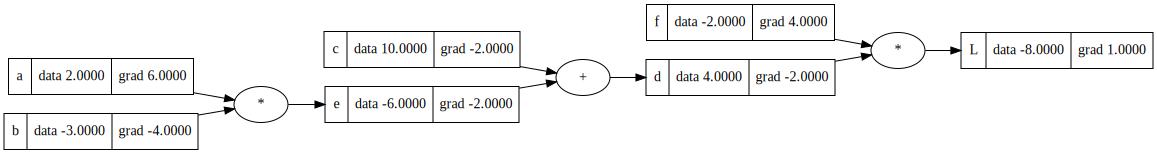

In [69]:
draw_dot(L)

In [68]:
L.backward()

### Now Lets Build the NN 

In [ ]:
#inputs x1,x2.. xn 
#wieghts w1,w2.. wn
#inputs * weights + b(acc to no of neuron)


class MLP:
    
    def __init__(self, )
    
    


# Experiments 

In [94]:
import math

class Value:
    def __init__(self, data, _children=(), _op='', label=''):
    
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        
        return f"Value(data={self.data})"

    def __add__(self, other):
       
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward

        return out

    def __sub__(self, other):
       
        out = Value(self.data - other.data, (self, other), '-')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad -= 1.0 * out.grad

        out._backward = _backward

        return out

    def __mul__(self, other):
        
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def __truediv__(self, other):
       
        out = Value(self.data / other.data, (self, other), '/')

        def _backward():
            self.grad += (1 / other.data) * out.grad
            other.grad -= (self.data / (other.data ** 2)) * out.grad

        out._backward = _backward

        return out

    def __pow__(self, other):
       
        out = Value(self.data ** other.data, (self, other), '**')

        def _backward():
            self.grad += (other.data * (self.data ** (other.data - 1))) * out.grad
            other.grad += (math.log(self.data) * (self.data ** other.data)) * out.grad

        out._backward = _backward

        return out

    def log(self, base=math.e):
        
        log_data = math.log(self.data, base)
        out = Value(log_data, (self,), 'log')

        def _backward():
            self.grad += (1 / (self.data * math.log(base))) * out.grad

        out._backward = _backward

        return out

    def sqrt(self):
        
        sqrt_data = math.sqrt(self.data)
        out = Value(sqrt_data, (self,), 'sqrt')

        def _backward():
            self.grad += (1 / (2 * sqrt_data)) * out.grad

        out._backward = _backward

        return out

    def reset_gradient(self):
        
        self.grad = 0.0

    @property
    def gradient(self):
        
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

        return self.grad

    @property
    def computation_graph(self):
        
        graph = {}
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in topo:
            graph[node] = {'op': node._op, 'children': [child for child in node._prev]}

        return graph


In [95]:
a = Value(2)
b = Value(3)
result = a ** b
print(result.data) 

8


In [96]:
x = Value(10)
result = x.log()  
print(result.data)  

result_base_10 = x.log(10)  
print(result_base_10.data)  


2.302585092994046
1.0


In [97]:
y = Value(25)
result = y.sqrt()
print(result.data)  


5.0


In [98]:
z = Value(5)
z.grad = 10  # Set gradient to 10
print(z.grad) 

z.reset_gradient()  # Reset gradient to zero
print(z.grad)  #


10
0.0


In [101]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [102]:
graph = L.computation_graph  d
print(graph)

{Value(data=-2.0): {'op': '', 'children': []}, Value(data=2.0): {'op': '', 'children': []}, Value(data=-3.0): {'op': '', 'children': []}, Value(data=-6.0): {'op': '*', 'children': [Value(data=2.0), Value(data=-3.0)]}, Value(data=10.0): {'op': '', 'children': []}, Value(data=4.0): {'op': '+', 'children': [Value(data=-6.0), Value(data=10.0)]}, Value(data=-8.0): {'op': '*', 'children': [Value(data=-2.0), Value(data=4.0)]}}


In [100]:
x = Value(2)
y = Value(3)
z = x + y
graph = z.computation_graph 
print(graph)


{Value(data=3): {'op': '', 'children': []}, Value(data=2): {'op': '', 'children': []}, Value(data=5): {'op': '+', 'children': [Value(data=3), Value(data=2)]}}
